<a href="https://colab.research.google.com/github/edysetyobayuaji/ElectronicSales/blob/master/Copy_of_Assignment_Data_Terstruktur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 1. Baca dataset
file_path = '/content/supermarket_sales.csv'  # Sesuaikan path ke file Anda
data = pd.read_csv(file_path)

In [ ]:
# 2. Konversi kolom 'Date' ke format datetime
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')


In [ ]:
# 3. Agregasi total penjualan harian berdasarkan kategori produk
daily_sales = data.groupby(['Date', 'Product line'])['Total'].sum().reset_index()


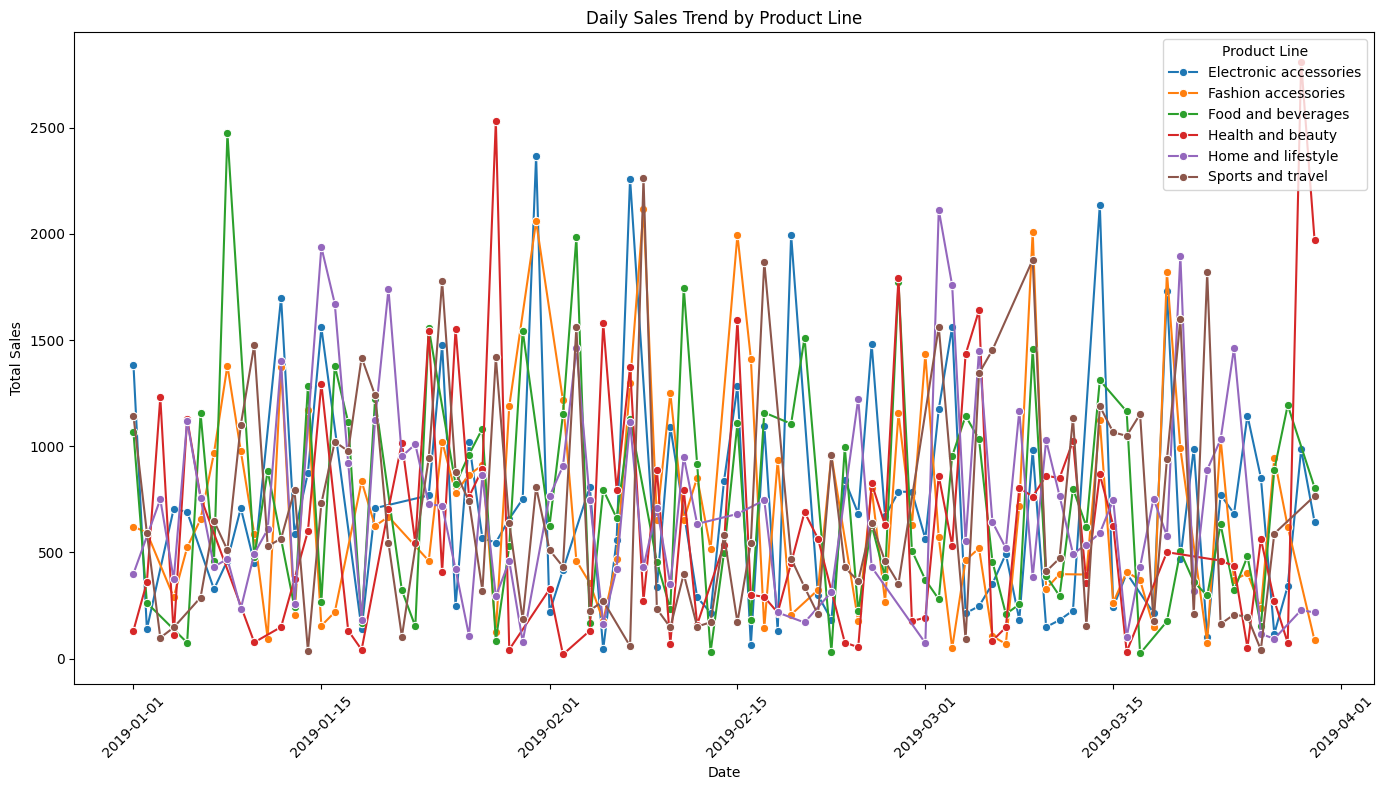

In [ ]:
# 4. Visualisasi tren penjualan harian berdasarkan kategori produk
plt.figure(figsize=(14, 8))
sns.lineplot(data=daily_sales, x='Date', y='Total', hue='Product line', marker="o")
plt.title('Daily Sales Trend by Product Line')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Konversi kolom 'Time' ke format datetime dan ekstrak jam
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour



In [ ]:
# 3. Agregasi data berdasarkan jam
hourly_transactions = data.groupby('Time').size().reset_index(name='Transaction Count')



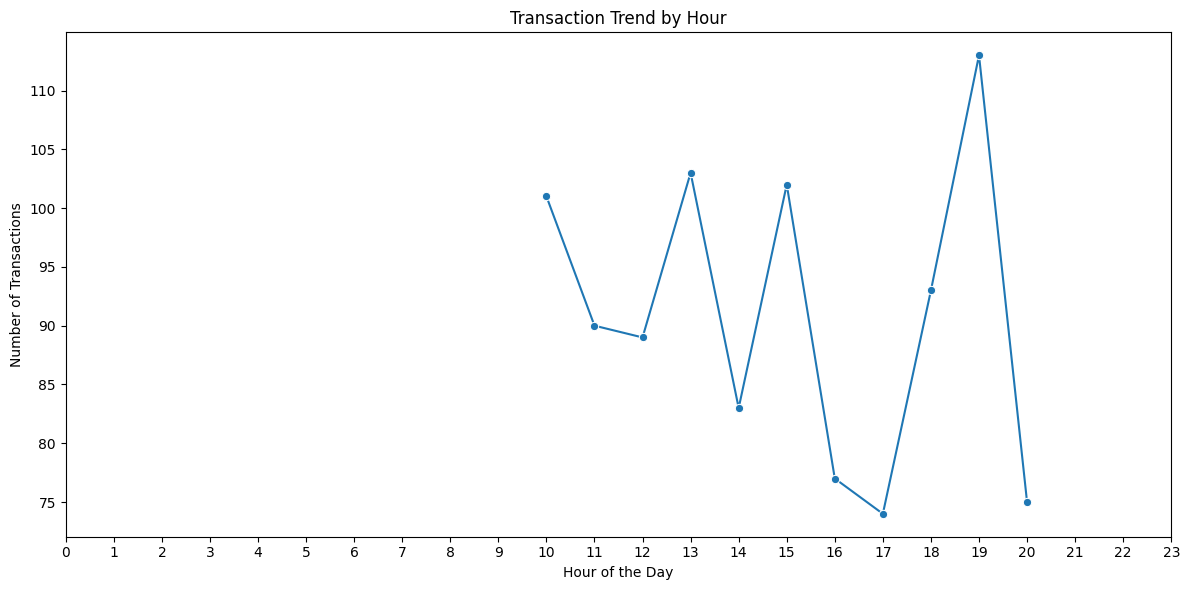

In [ ]:
# 4. Visualisasi tren transaksi berdasarkan jam
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_transactions, x='Time', y='Transaction Count', marker="o")
plt.title('Transaction Trend by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # Set ticks for each hour
plt.tight_layout()
plt.show()

In [ ]:
# 3. Agregasi data berdasarkan jam dan jenis kelamin
hourly_gender_transactions = data.groupby(['Time', 'Gender']).size().reset_index(name='Transaction Count')


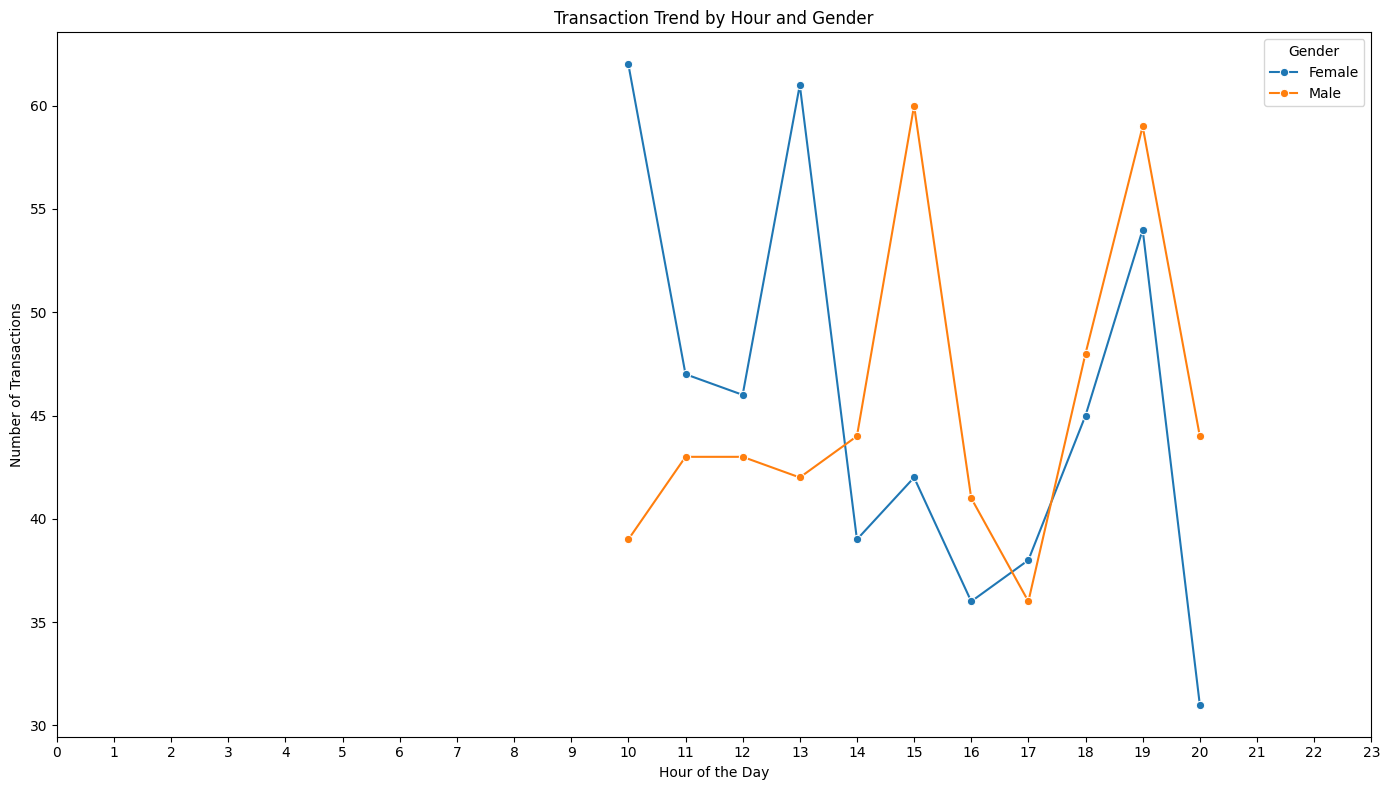

In [ ]:
# 4. Visualisasi tren transaksi berdasarkan jam dan jenis kelamin
plt.figure(figsize=(14, 8))
sns.lineplot(data=hourly_gender_transactions, x='Time', y='Transaction Count', hue='Gender', marker="o")
plt.title('Transaction Trend by Hour and Gender')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # Set ticks for each hour
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

In [ ]:
# 3. Tambahkan kolom bulan sebagai string untuk agregasi bulanan
data['Month'] = data['Date'].dt.to_period('M').astype(str)  # Ubah ke string

In [ ]:
# 4. Agregasi penjualan bulanan berdasarkan kategori produk
monthly_sales = data.groupby(['Month', 'Product line'])['Quantity'].sum().reset_index()

In [ ]:

# 5. Identifikasi produk terlaris
top_products = monthly_sales.groupby('Product line')['Quantity'].sum().sort_values(ascending=False)
print("Produk Terlaris:")
print(top_products)

Produk Terlaris:
Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64


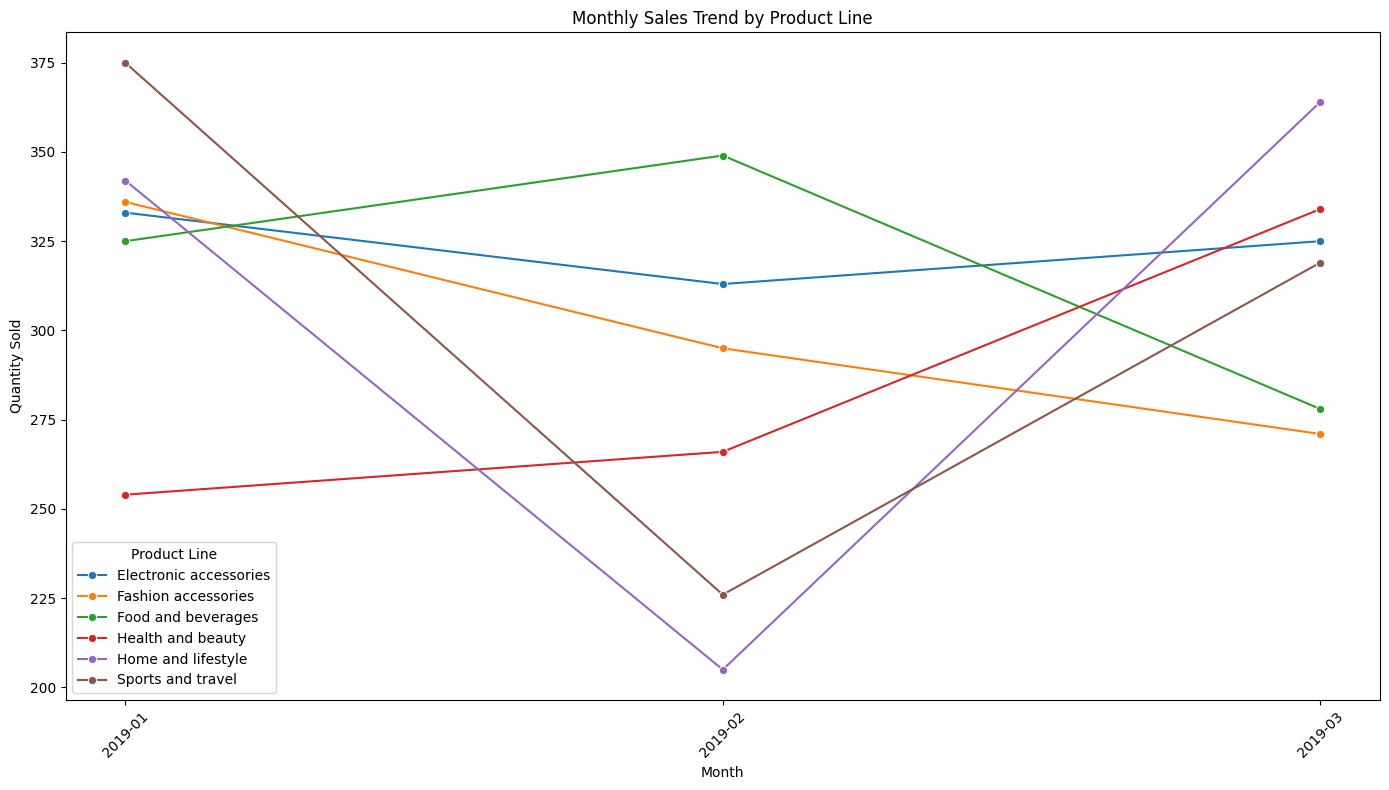

In [ ]:
# 6. Visualisasi tren penjualan bulanan berdasarkan kategori produk
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='Month', y='Quantity', hue='Product line', marker="o")
plt.title('Monthly Sales Trend by Product Line')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Product Line')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

# 7. Estimasi kebutuhan inventory berdasarkan tren rata-rata
average_monthly_sales = monthly_sales.groupby('Product line')['Quantity'].mean()
print("\nEstimasi Rata-rata Kebutuhan Inventory Bulanan per Produk:")
print(average_monthly_sales)


Estimasi Rata-rata Kebutuhan Inventory Bulanan per Produk:
Product line
Electronic accessories    323.666667
Fashion accessories       300.666667
Food and beverages        317.333333
Health and beauty         284.666667
Home and lifestyle        303.666667
Sports and travel         306.666667
Name: Quantity, dtype: float64


In [ ]:
# 3. Agregasi data penjualan harian
daily_sales = data.groupby('Date')['Total'].sum().reset_index()
daily_sales.columns = ['ds', 'y']  # Ubah nama kolom sesuai dengan format Prophet

In [ ]:
# 4. Buat model Prophet
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# (Optional) Tambahkan komponen hari libur
# Contoh: Menambahkan libur tertentu seperti hari libur nasional atau festival
# holidays = pd.DataFrame({
#     'holiday': 'special_day',
#     'ds': pd.to_datetime(['2023-12-25', '2024-01-01']),  # Tanggal contoh
#     'lower_window': 0,
#     'upper_window': 1,
# })
# model = Prophet(holidays=holidays)



In [ ]:
# 5. Latih model
model.fit(daily_sales)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a27sv8i/wpv1s33a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6a27sv8i/s9y7jjkl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50410', 'data', 'file=/tmp/tmp6a27sv8i/wpv1s33a.json', 'init=/tmp/tmp6a27sv8i/s9y7jjkl.json', 'output', 'file=/tmp/tmp6a27sv8i/prophet_modelc6h9rpql/prophet_model-20241105131852.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
13:18:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# 6. Prediksi untuk periode mendatang (misalnya 30 hari ke depan)
future = model.make_future_dataframe(periods=30)  # Sesuaikan dengan periode yang diinginkan
forecast = model.predict(future)

<Figure size 1400x800 with 0 Axes>

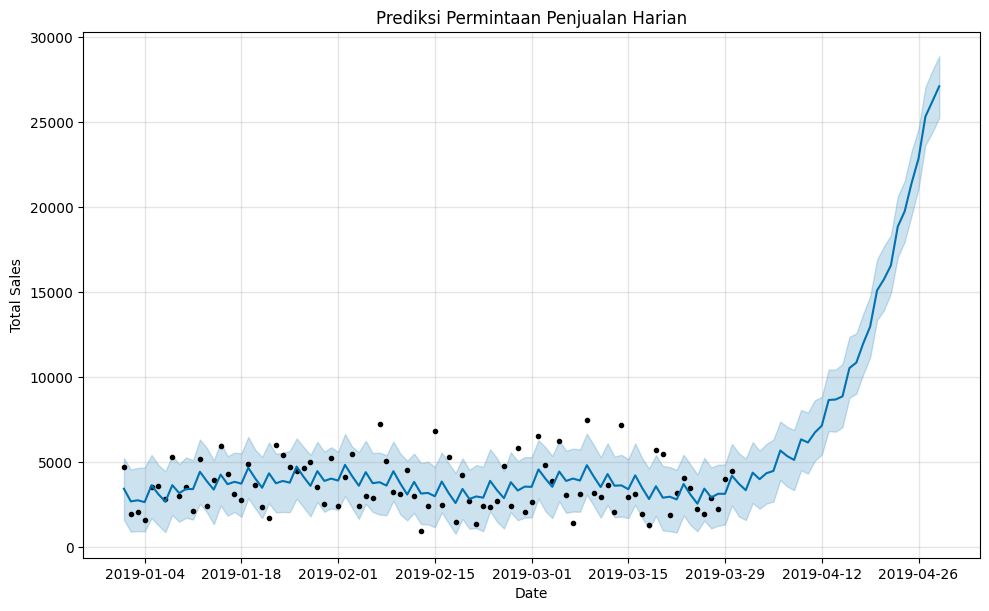

In [ ]:
# 7. Visualisasi hasil prediksi
plt.figure(figsize=(14, 8))
model.plot(forecast)
plt.title('Prediksi Permintaan Penjualan Harian')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

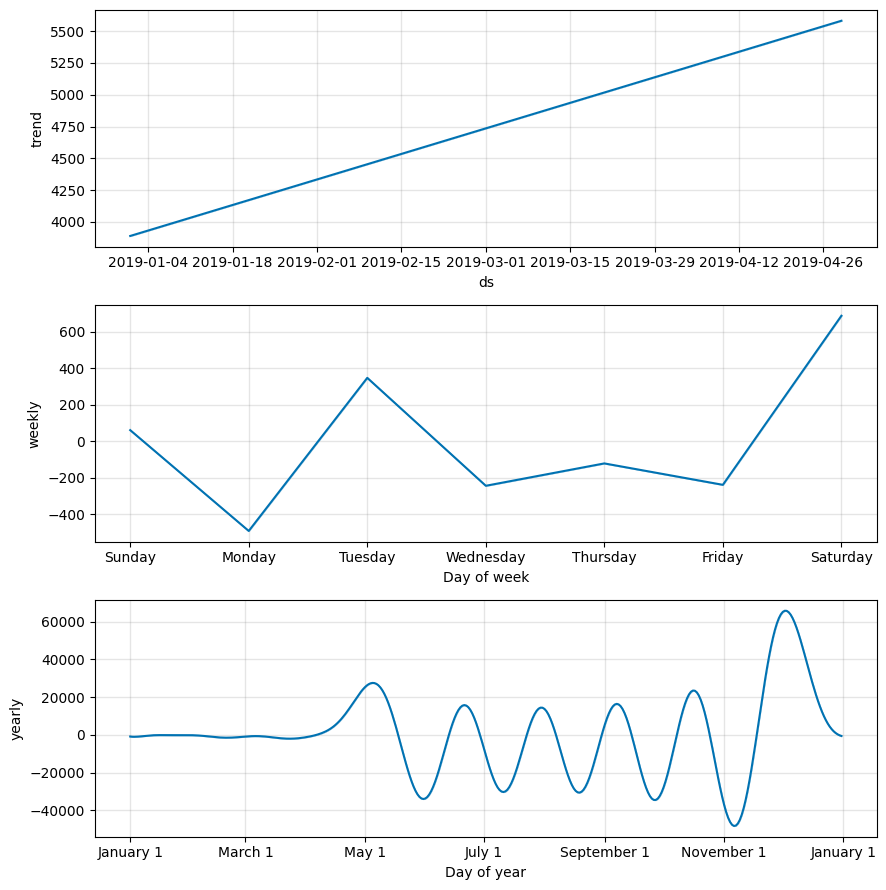

In [ ]:

# 8. (Optional) Visualisasi komponen musiman (trend, yearly, weekly)
model.plot_components(forecast)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# 1. Baca dataset
file_path = '/path/to/supermarket_sales.csv'  # Sesuaikan path ke file Anda
data = pd.read_csv(file_path)

# 2. Konversi kolom 'Date' ke format datetime dan agregasi data penjualan harian
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')
daily_sales = data.groupby('Date')['Total'].sum().reset_index()

# 3. Sort data berdasarkan tanggal
daily_sales = daily_sales.sort_values('Date')

# 4. Skala data ke rentang [0, 1] untuk membantu konvergensi LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(daily_sales[['Total']])

# 5. Siapkan data untuk LSTM (menggunakan window size)
window_size = 30  # Menggunakan 30 hari sebelumnya untuk memprediksi hari berikutnya
X, y = [], []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# 6. Ubah bentuk data X agar sesuai dengan input LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# 7. Bangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# 8. Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# 9. Latih model
model.fit(X, y, batch_size=32, epochs=20)

# 10. Prediksi untuk periode mendatang
# Membuat data untuk prediksi ke depan (misalnya, 30 hari ke depan)
test_input = scaled_data[-window_size:]  # Mengambil data terakhir sebagai input
predictions = []

for _ in range(30):  # Misalnya prediksi 30 hari ke depan
    test_input = np.reshape(test_input, (1, window_size, 1))
    pred = model.predict(test_input, verbose=0)
    predictions.append(pred[0, 0])
    test_input = np.append(test_input[:, 1:, :], [[pred]], axis=1)

# 11. Invers skala hasil prediksi ke nilai asli
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# 12. Visualisasi hasil prediksi
plt.figure(figsize=(14, 8))
plt.plot(daily_sales['Date'], daily_sales['Total'], label='Data Penjualan Aktual')
future_dates = pd.date_range(daily_sales['Date'].iloc[-1] + pd.Timedelta(days=1), periods=30)
plt.plot(future_dates, predictions, color='red', label='Prediksi Penjualan Masa Depan')
plt.title('Prediksi Permintaan Penjualan Harian')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/supermarket_sales.csv'